In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteB3OYTU/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteB3OYTU/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteB3OYTU/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

In [ ]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
print(len(training_labels))
print(len(testing_labels))

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

25000
25000


In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 140
trunc_type='post'
oov_tok='<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

In [ ]:
import random as rnd
randIndex = rnd.randrange(0, len(testing_sentences))
print(randIndex)
print(testing_sentences[randIndex])
print(testing_labels[randIndex])

10821
b"Since Wesley Snipes descended(or Ascended)to the world of DTV action movies the result has been Miss,so-so,and miss.Unstoppible was weak.7 seconds was entertaining.The marksman was the proverbial scraping of the septic tank.<br /><br />And what of The Detonator?We'll anything would be above suffering the Marksman again.But the Detonator holds a small amount of merit that is hampered by a lazy star and Low budget.<br /><br />Sonny Griffith is a not-so-by-the-book Covert op who busts illegal arms dealers in Poland.When his latest assignment ends up a bullet-buffet leaving a pile of bodies;Sonny then is ordered to escort a witness; Nadia (the ever-hot Silvia Colloca) to the US.Trouble is; Sonny is being duped by a traitor in his own organization who is keeping his trail hot for Gangsters with Nuclier Ambitions.<br /><br />Snipes delivers in the action department.He is in half-blade mode here.He actually does well in the first 15 minutes of the Detonator,before descending into pure

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             #tf.keras.layers.Conv1D(16, activation=relu)
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             #tf.keras.layers.Dropout(.2),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])

model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 28s 36ms/step - loss: 0.4312 - acc: 0.8012 - val_loss: 0.3767 - val_acc: 0.8363
Epoch 2/10
782/782 [==============================] - 26s 34ms/step - loss: 0.2697 - acc: 0.8927 - val_loss: 0.4019 - val_acc: 0.8243
Epoch 3/10
782/782 [==============================] - 27s 34ms/step - loss: 0.2064 - acc: 0.9230 - val_loss: 0.4825 - val_acc: 0.8116
Epoch 4/10
782/782 [==============================] - 26s 34ms/step - loss: 0.1422 - acc: 0.9479 - val_loss: 0.5219 - val_acc: 0.8047
Epoch 5/10
782/782 [==============================] - 26s 34ms/step - loss: 0.0845 - acc: 0.9718 - val_loss: 0.6814 - val_acc: 0.7939
Epoch 6/10
782/782 [==============================] - 26s 34ms/step - loss: 0.0643 - acc: 0.9772 - val_loss: 0.8203 - val_acc: 0.7986
Epoch 7/10
782/782 [==============================] - 27s 34ms/step - loss: 0.0398 - acc: 0.9867 - val_loss: 0.9720 - val_acc: 0.7888
Epoch 8/10
782/782 [==============================] - 26s 34ms

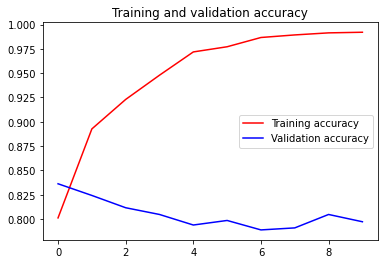

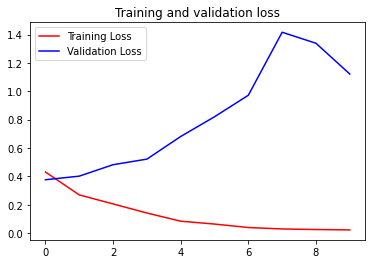

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import random as rnd
randIndex = rnd.randrange(0, len(testing_sentences))
#print(randIndex)
#print(testing_sentences[randIndex])
#print(testing_labels[randIndex])

testStringSequence = tokenizer.texts_to_sequences([testing_sentences[randIndex]])
paddedSequence = pad_sequences(testStringSequence, maxlen=max_length, truncating=trunc_type)

prediction = model.predict(paddedSequence)
for review in range(len(prediction)):
  if prediction[review][0] >= .5:
    pred = "Positive Rating"
  else:
    pred = "Negative Rating"
  print("{testStr} : {preds}".format(testStr = testing_sentences[randIndex], preds=pred))
  print(prediction[review][0])
  print(testing_labels[randIndex])


b"First, the obvious\xc2\x97as a cop drama crossed with a funny melodrama, QUAY \xc2\x85 is disconcerting ,straightly independent and a menace to banality. Jouvet's aplomb is put to good use in a tough cop performance immediately noticeable by its vigor and exuberant force; his Antoine is not so much a man of intellect, but a man of vast life experience and earthly instinct. QUAY \xc2\x85 is not subversive in the sense that today's (and already yesterday's ) philistines enjoy using the word. It is Clouzot's most playful hour. He tended to adapt Steeman's books in a satiric note. (It's said that Clouzot was a big reader of detective novels.) As a director, Clouzot's firm hand is successful. <br /><br />It is not a mystery or a thriller,but a satirical look at a Parisian couple and at the police's proceedings. Those accustomed with Clouzot's masterpiece LES DIABOLIQUES might find slightly disconcerting the multiplicity of things, styles, elements in QUAY \xc2\x85.Here Clouzot speaks abou

In [ ]:
model.save('Sentiment.h5') 
import pickle as pkl
fileDump = open("sentimentTokenizer.pkl", "wb")
pkl.dump(tokenizer, fileDump)

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

inv_tokenizer = {v: k for k, v in word_index.items()}
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = inv_tokenizer.get(word_num)
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(10000, 16)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>